<a href="https://colab.research.google.com/github/fotrino/austral/blob/main/AutoML_TPot%2BPyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AutoML
 
## ¿Que es?
El Aprendizaje Automático Automatizado (AutoML) consiste en generar procesos de aprendizaje automático que obtengan resultados por sí mismo.
 
## Porque utilizar AutoML
Al automatizar la mayoría de las tareas necesarias para desarrollar modelos de aprendizaje automático, los científicos de datos pueden centrarse en problemas más complejos.
 
## Componentes AutoML
* Automated feature preprocessing
* Automated algorithm selection
* Hyperparameter optimization


## Procesamiento Datos

In [1]:
! pip install --quiet tpot
! pip install --quiet pycaret
! pip install --quiet shap

     |████████████████████████████████| 87 kB 3.0 MB/s 
     |████████████████████████████████| 166.7 MB 14 kB/s 
     |████████████████████████████████| 160 kB 69.1 MB/s 
     |████████████████████████████████| 264 kB 5.1 MB/s 
     |████████████████████████████████| 1.3 MB 44.8 MB/s 
     |████████████████████████████████| 80 kB 7.3 MB/s 
     |████████████████████████████████| 14.6 MB 85 kB/s 
     |████████████████████████████████| 6.8 MB 43.1 MB/s 
     |████████████████████████████████| 271 kB 65.8 MB/s 
     |████████████████████████████████| 167 kB 51.2 MB/s 
     |████████████████████████████████| 248 kB 69.2 MB/s 
     |████████████████████████████████| 108 kB 63.0 MB/s 
     |████████████████████████████████| 56 kB 3.6 MB/s 
     |████████████████████████████████| 1.7 MB 55.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |█████████████████████

In [2]:
import pandas as pd
import numpy as np
from pycaret.datasets import get_data


# Clasificacion - TPOT

In [3]:
# Importo las librerias
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split

In [24]:
# df = get_data('bank')
df = pd.read_csv('/content/paquete_premium_201910.txt.zip', compression="zip", delimiter = "\t")
df = df.drop(columns=['numero_de_cliente', 'foto_mes'])

In [27]:
df

,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,cproductos,tpaquete2,tpaquete3,tcuentas,ccuenta_corriente,mcuenta_corriente_adicional,mcuenta_corriente,ccaja_ahorro,mcaja_ahorro,mcaja_ahorro_adicional,mcaja_ahorro_dolares,mdescubierto_preacordado,mcuentas_saldo,ctarjeta_debito,ctarjeta_debito_transacciones,mautoservicio,ctarjeta_visa,ctarjeta_visa_transacciones,mtarjeta_visa_consumo,ctarjeta_master,ctarjeta_master_transacciones,mtarjeta_master_consumo,cprestamos_personales,mprestamos_personales,cprestamos_prendarios,mprestamos_prendarios,cprestamos_hipotecarios,mprestamos_hipotecarios,cplazo_fijo,mplazo_fijo_dolares,...,Master_msaldototal,Master_msaldopesos,Master_msaldodolares,Master_mconsumospesos,Master_mconsumosdolares,Master_mlimitecompra,Master_madelantopesos,Master_madelantodolares,Master_fultimo_cierre,Master_mpagado,Master_mpagospesos,Master_mpagosdolares,Master_fechaalta,Master_mconsumototal,Master_cconsumos,Master_cadelantosefectivo,Master_mpagominimo,Visa_delinquency,Visa_status,Visa_mfinanciacion_limite,Visa_Fvencimiento,Visa_Finiciomora,Visa_msaldototal,Visa_msaldopesos,Visa_msaldodolares,Visa_mconsumospesos,Visa_mconsumosdolares,Visa_mlimitecompra,Visa_madelantopesos,Visa_madelantodolares,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo,clase_ternaria
0,1,0,0,55,117,0.0,0.0,0.0,0.0,0.0,10,0,0,1,1,0.0,-1538.25,2,604.14,0.0,0.00,1.17,-3199.18,1,4,3832.92,1,0,0.00,1,0,0.00,0,0.00,0,0.0,0,0.0,0,0.0,...,0.00,0.00,0.0,NaN,NaN,70200.0,NaN,NaN,1.0,0.0,NaN,NaN,2807.0,NaN,NaN,NaN,0.0,0.0,1.0,63180.0,-485.0,NaN,-89.00,-104.13,0.00,NaN,NaN,70200.0,NaN,NaN,1.0,0.0,NaN,NaN,3539.0,NaN,NaN,NaN,0.0,CONTINUA
1,1,0,1,47,85,0.0,0.0,0.0,0.0,0.0,9,0,0,1,1,0.0,-9.98,2,4062.42,0.0,0.00,0.00,-154.72,1,6,5957.06,0,0,0.00,0,0,0.00,1,152842.97,0,0.0,0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CONTINUA
2,1,0,1,51,22,0.0,0.0,0.0,0.0,0.0,8,0,0,1,1,0.0,-7450.53,2,501.69,0.0,0.00,1.17,972.04,2,0,0.00,1,16,25960.58,1,10,15868.53,0,0.00,0,0.0,0,0.0,0,0.0,...,16058.95,16058.95,0.0,14404.68,0.0,280800.0,0.0,0.0,1.0,0.0,-7940.55,0.0,666.0,14404.68,8.0,0.0,854.1,0.0,1.0,252720.0,-457.0,NaN,22513.31,8285.62,18054.94,20132.72,296.67,280800.0,0.0,0.0,1.0,0.0,-25379.38,302.29,666.0,20132.72,10.0,0.0,1766.7,CONTINUA
3,1,0,1,47,187,0.0,0.0,0.0,0.0,0.0,6,0,0,1,1,0.0,0.00,2,60625.60,0.0,92.94,1.17,11312.56,1,20,17139.78,1,20,12568.08,0,0,0.00,0,0.00,0,0.0,0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,252720.0,-273.0,NaN,82335.52,96332.55,0.00,1774.48,0.00,280800.0,0.0,0.0,1.0,0.0,-9009.00,0.00,3028.0,1774.48,4.0,0.0,12776.4,CONTINUA
4,1,0,1,41,263,0.0,0.0,0.0,0.0,0.0,11,0,0,1,1,0.0,-26.39,2,9480.17,0.0,0.00,1.17,38978.46,1,35,13938.17,1,15,12435.77,1,0,0.00,1,102515.87,0,0.0,0,0.0,0,0.0,...,0.00,0.00,0.0,NaN,NaN,84240.0,NaN,NaN,1.0,0.0,NaN,NaN,3066.0,NaN,NaN,NaN,0.0,0.0,1.0,151632.0,-1521.0,NaN,11110.62,12999.42,0.00,7863.80,0.00,168480.0,0.0,0.0,8.0,0.0,-14536.37,0.00,5083.0,7863.80,10.0,0.0,1333.8,CONTINUA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203118,1,0,0,44,1,0.0,0.0,0.0,0.0,0.0,6,0,0,1,1,0.0,0.00,2,4773.70,0.0,0.00,0.00,2817.72,1,0,0.00,1,0,0.00,1,0,0.00,0,0.00,0,0.0,0,0.0,0,0.0,...,0.00,0.00,0.0,NaN,NaN,84240.0,NaN,NaN,1.0,0.0,NaN,NaN,24.0,NaN,NaN,NaN,0.0,0.0,1.0,75816.0,-2191.0,NaN,0.00,0.00,0.00,NaN,NaN,84240.0,NaN,NaN,1.0,0.0,NaN,NaN,24.0,NaN,NaN,NaN,0.0,CONTINUA
203119,1,0,1,50,1,0.0,0.0

In [28]:
# Convierto el target a numerico
df.clase_ternaria = df.clase_ternaria.map({'CONTINUA':0, 'BAJA+1':0, 'BAJA+2':1})

# TPot no tiene ningun preprocesamiento cuando la columna es de tipo string. Se tiene que realizar el preprocesamiento de forma manual
columnasObject = df.select_dtypes(include=np.object).columns
print(df.dtypes)
print(columnasObject)

for columna in columnasObject:
  df = pd.concat([df.drop(columna, axis=1), pd.get_dummies(df[columna])], axis=1)

active_quarter               int64
cliente_vip                  int64
internet                     int64
cliente_edad                 int64
cliente_antiguedad           int64
                            ...   
Visa_mconsumototal         float64
Visa_cconsumos             float64
Visa_cadelantosefectivo    float64
Visa_mpagominimo           float64
clase_ternaria               int64
Length: 153, dtype: object
Index([], dtype='object')


In [31]:
# Separo el modleo entre train y test
X_train, X_test, y_train, y_test = train_test_split(df.drop(['clase_ternaria'], axis=1), df.clase_ternaria, train_size=0.75, test_size=0.25, random_state=42)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(152342, 152)
(50781, 152)
(152342,)
(50781,)


## Configuracion template

In [33]:
generations=2
population_size=5
pipeline_optimizer = TPOTClassifier(
    generations=generations, 
    population_size=population_size, 
    subsample=.5,
    verbosity=2, 
    random_state=42,
    memory='auto',
    n_jobs=-1,
    scoring='roc_auc',
    config_dict='TPOT light')

In [34]:
pipeline_optimizer.fit(X_train, y_train)

Imputing missing values in feature set


Optimization Progress:   0%|          | 0/15 [00:00<?, ?pipeline/s]



TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: GaussianNB(input_matrix)


TPOTClassifier(config_dict='TPOT light', crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=2,
               log_file=None, max_eval_time_mins=5, max_time_mins=None,
               memory='auto', mutation_rate=0.9, n_jobs=-1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=5,
               random_state=42, scoring='roc_auc', subsample=0.5, template=None,
               use_dask=False, verbosity=2, warm_start=False)

In [35]:
pipeline_optimizer.export('tpot_export_light_pipeline.py')

## PyCaret
https://pycaret.readthedocs.io/

In [36]:
from pycaret.classification import *
from pycaret.utils import enable_colab

In [37]:
enable_colab()

Colab mode enabled.


In [38]:
clf = setup(data = df, target = 'clase_ternaria',silent=True) # Por defecto hace un preprocesamiento basico imputa los nulos y transforma datos categoricos

,Description,Value
0,session_id,7023
1,Target,clase_ternaria
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(203123, 153)"
5,Missing Values,True
6,Numeric Features,109
7,Categorical Features,43
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
# Entrena todos los modelos con los parametros por defecto, la funcion devuelve el mejor modelo
bestModel = compare_models(sort = 'AUC',fold=3)

IntProgress(value=0, description='Processing: ', max=74)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:16:44
Status,. . . . . . . . . . . . . . . . . .,Fitting 3 Folds
Estimator,. . . . . . . . . . . . . . . . . .,K Neighbors Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9959,0.8574,0.0091,0.1087,0.0168,0.0162,0.0304,69.33


In [16]:
# Optimizacion de hiper parametros
bestModel = tune_model(bestModel,optimize = 'AUC',fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8997,0.9200,0.4130,0.6129,0.4935,0.4402,0.4508
1,0.9018,0.9280,0.4457,0.6181,0.5179,0.4648,0.4726
2,0.9014,0.9187,0.4043,0.6328,0.4934,0.4417,0.4553
Mean,0.9010,0.9222,0.4210,0.6213,0.5016,0.4489,0.4595
SD,0.0009,0.0041,0.0178,0.0084,0.0115,0.0113,0.0094


In [17]:
# Multiples graficos para evaluar los modelos
evaluate_model(bestModel)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

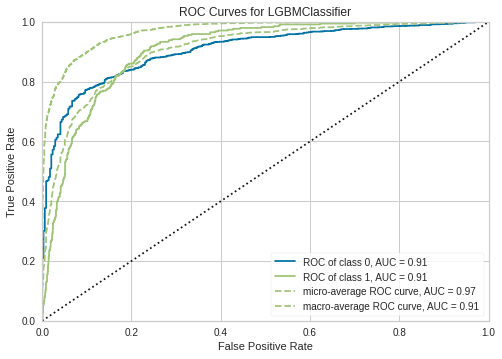

In [18]:
plot_model(bestModel)

In [19]:
final_rf = finalize_model(bestModel) # Entrena el dataset en todo el conjunto de datos